In [10]:
import pandas as pd
import matplotlib as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import SGDClassifier
import xgboost
from xgboost import plot_tree

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, plot_confusion_matrix, plot_roc_curve


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.svm import SVC

from sklearn.feature_selection import RFE


In [2]:
#df = pd.read_csv('data/weatherAUS.csv')
#df.head()

In [3]:
#df["Date"] = pd.to_datetime(df["Date"])
#df["Month"] = df["Date"].dt.month

In [4]:
#df.dropna(subset = ['RainTomorrow'], inplace = True)

In [5]:
#df.drop(columns = ['Evaporation', 'Date', 'Sunshine'], inplace=True, axis=1)

In [6]:
#df.head()

In [7]:
#df.info()

In [8]:
#df2 = df.copy()

In [9]:
#features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
#            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
#for feature in features:
#    qupper = df2[feature].quantile(0.99)
#    df2 = df2.loc[(df2[feature].isna()) | (df2[feature] < qupper)]

In [10]:
#df2.info()

In [11]:
#df2.isna().sum().sum()

In [12]:
#X = df2.drop('RainTomorrow', axis=1)
#y = df2['RainTomorrow']

In [13]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
#cols_simp = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
#simputer = SimpleImputer(strategy = 'most_frequent')
#simputed = simputer.fit_transform(X_train[cols_simp])
#simptest = simputer.transform(X_test[cols_simp])
#df_simp_tranformed = pd.DataFrame(simputed, index=X_train.index, columns=cols_simp)
#df_simp_tranformed


In [15]:
#X_train.drop(columns = cols_simp, axis=1, inplace=True)

In [16]:
#X_train_imp = pd.concat((X_train, df_simp_tranformed), axis=1)

In [17]:
#X_train_imp

In [18]:
#cols_encode = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Month']
#ohe = OneHotEncoder(sparse = False, handle_unknown='ignore')
#ohe_fit = ohe.fit_transform(X_train_imp[cols_encode])
#ohe_df = pd.DataFrame(ohe_fit, columns = ohe.get_feature_names(cols_encode), index = X_train_imp.index)
#ohe_df

In [19]:
#X_train_int = X_train_imp.drop(cols_encode, axis=1)

In [20]:
#X_train_ohe = pd.concat((X_train_int, ohe_df), axis=1)
#X_train_ohe

In [21]:
#imputer = KNNImputer(n_neighbors=5, weights="uniform")
#imputed = imputer.fit_transform(X_train_ohe)
#X_train_KNNI = pd.DataFrame(imputed, index = X_train_ohe.index, columns = X_train_ohe.columns)


In [11]:
X_train_KNNI = pd.read_csv("data/X_train_KNNI.csv", index_col=0)
X_test_KNNI = pd.read_csv("data/X_test_KNNI.csv", index_col=0)
y_test = pd.read_csv("data/y_test.csv", index_col=0)
y_train = pd.read_csv("data/y_train.csv", index_col=0)

In [23]:
X_train_KNNI

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
42305,12.8,23.5,0.0,7.600000,44.0,13.0,33.0,50.0,64.0,1014.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20387,13.8,18.5,0.0,8.402434,54.0,11.0,19.0,75.0,84.0,1022.9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
32951,15.5,24.9,0.0,7.600000,39.0,7.0,20.0,56.0,52.0,1022.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
91385,21.1,29.9,0.0,8.800000,35.0,20.0,30.0,66.0,74.0,1017.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115228,11.1,17.4,9.8,5.100000,48.0,30.0,19.0,65.0,42.0,1021.1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141951,21.1,32.5,0.0,10.500000,43.0,22.0,13.0,42.0,20.0,1015.3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
123095,14.2,19.4,33.0,2.900000,61.0,11.0,24.0,87.0,70.0,1006.8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
940,-1.4,14.7,0.0,4.600000,17.0,2.0,9.0,92.0,52.0,1028.9,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18334,8.8,14.7,0.2,9.250038,43.0,15.0,31.0,53.0,66.0,1023.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [4]:
X_train_scaled = X_train_KNNI.copy()
scale_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm','Cloud9am','Cloud3pm']
scale_feats = X_train_scaled[scale_cols]
scaler = StandardScaler()
newvals = scaler.fit_transform(scale_feats.values)
X_train_scaled[scale_cols] = newvals

In [5]:
X_test_scaled = X_test_KNNI.copy()
test_feats = X_test_scaled[scale_cols]
testvals = scaler.transform(test_feats.values)
X_test_scaled[scale_cols] = testvals

In [27]:
X_train_scaled

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
42305,0.150858,0.093642,-0.363902,7.600000,0.473496,-0.045172,1.892334,-1.085546,0.670865,-0.522141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20387,0.315599,-0.689443,-0.363902,8.402434,1.346063,-0.295357,0.125154,0.341575,1.718444,0.785074,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
32951,0.595657,0.312906,-0.363902,7.600000,0.037212,-0.795728,0.251381,-0.743037,0.042318,0.737249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
91385,1.518203,1.095992,-0.363902,8.800000,-0.311814,0.830477,1.513652,-0.172189,1.194654,-0.107658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115228,-0.129200,-0.861722,1.772255,5.100000,0.822523,2.081403,0.125154,-0.229273,-0.481471,0.498125,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141951,1.518203,1.503196,-0.363902,10.500000,0.386239,1.080662,-0.632208,-1.542224,-1.633808,-0.426491,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
123095,0.381495,-0.548488,6.829280,2.900000,1.956859,-0.295357,0.756290,1.026593,0.985139,-1.781530,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
940,-2.188455,-1.284588,-0.363902,4.600000,-1.882434,-1.421191,-1.137117,1.312017,0.042318,1.741573,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18334,-0.508103,-1.284588,-0.320307,9.250038,0.386239,0.205013,1.639879,-0.914291,0.775623,0.801016,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
X_test_scaled

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
49154,-0.738740,0.124966,-0.363902,7.000000,0.211726,-0.795728,-0.632208,0.684084,-0.324334,1.311149,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105122,-1.134117,-0.000328,-0.363902,7.500000,0.037212,0.455199,-1.515798,0.284490,-0.376713,1.629981,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2897,0.019066,1.675475,-0.363902,11.200000,-0.748098,-0.545542,-1.137117,-0.343443,-1.633808,-0.458374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3691,0.463865,0.892389,1.903040,7.720406,-1.097124,0.455199,-1.137117,0.512829,0.094697,-1.032273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
141441,1.930054,1.722460,2.513371,8.300000,2.742169,-0.545542,0.251381,0.626999,0.304213,-1.414873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105737,-0.458681,-0.705105,-0.363902,4.400000,0.211726,0.705384,0.251381,-0.857206,2.032717,-0.809090,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14371,-0.821110,-0.705105,-0.363902,0.900000,-0.137301,0.830477,0.251381,0.398660,0.618486,1.629981,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91627,0.892190,0.344230,-0.363902,9.100000,0.822523,-0.545542,2.649696,0.113236,0.880381,0.402475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
93580,0.974560,1.612828,-0.363902,10.000000,0.648009,2.206496,0.251381,-3.597277,-1.948081,-0.554024,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
X_train_KNNI

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
42305,12.8,23.5,0.0,7.600000,44.0,13.0,33.0,50.0,64.0,1014.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20387,13.8,18.5,0.0,8.402434,54.0,11.0,19.0,75.0,84.0,1022.9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
32951,15.5,24.9,0.0,7.600000,39.0,7.0,20.0,56.0,52.0,1022.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
91385,21.1,29.9,0.0,8.800000,35.0,20.0,30.0,66.0,74.0,1017.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115228,11.1,17.4,9.8,5.100000,48.0,30.0,19.0,65.0,42.0,1021.1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141951,21.1,32.5,0.0,10.500000,43.0,22.0,13.0,42.0,20.0,1015.3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
123095,14.2,19.4,33.0,2.900000,61.0,11.0,24.0,87.0,70.0,1006.8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
940,-1.4,14.7,0.0,4.600000,17.0,2.0,9.0,92.0,52.0,1028.9,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18334,8.8,14.7,0.2,9.250038,43.0,15.0,31.0,53.0,66.0,1023.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Noodeling

## Baseline

In [5]:
def model_metrics(model, X_train, y_train, X_test, y_test, name):
    
    # calculate training data metrics
    y_train_pred = model.predict(X_train)
    accuracy_train = round(accuracy_score(y_train, y_train_pred), 3)
    recall_train = round(recall_score(y_train, y_train_pred), 3)
    precision_train = round(precision_score(y_train, y_train_pred), 3)
    f1_train = round(f1_score(y_train, y_train_pred), 3)
    cv = round(cross_val_score(model, X_train, y_train).mean(), 3)
    
    # calculate test data metrics
    y_test_pred = model.predict(X_test)
    accuracy_test = round(accuracy_score(y_test, y_test_pred), 3)
    recall_test = round(recall_score(y_test, y_test_pred), 3)
    precision_test = round(precision_score(y_test, y_test_pred), 3)
    f1_test = round(f1_score(y_test, y_test_pred), 3)
    
    # print metrics
    print(f"""
    {name} Model Training Metrics:
    Accuracy Score: {accuracy_train}
    Recall Score: {recall_train}
    Precision Score: {precision_train}
    F1 Score: {f1_train}
    Cross Validation Score: {cv}
    ------
    {name} Model Test Metrics:
    Accuracy Score: {accuracy_test}
    Recall Score: {recall_test}
    Precision Score: {precision_test}
    F1 Score: {f1_test}
    """)
    
    # plot confusion matrices & roc curves
    print(f"{name} Model Training Confusion Matrix")
    plt.show(plot_confusion_matrix(model, X_train, y_train, cmap='rocket'))
    print(f"{name} Model Training ROC Curve")
    plt.show(plot_roc_curve(model, X_train, y_train))
    print(f"{name} Model Test Confusion Matrix")
    plt.show(plot_confusion_matrix(model, X_test, y_test, cmap='rocket'))
    print(f"{name} Model Test ROC Curve")
    plt.show(plot_roc_curve(model, X_test, y_test))

In [31]:
baseline = DummyClassifier(random_state=42)
baseline.fit(X_train_KNNI, y_train)

C:\Users\steve\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier(random_state=42)

C:\Users\steve\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "



    baseline Model Training Metrics:
    Accuracy Score: 0.667
    Recall Score: 0.206
    Precision Score: 0.206
    F1 Score: 0.206
    Cross Validation Score: 0.669
    ------
    baseline Model Test Metrics:
    Accuracy Score: 0.668
    Recall Score: 0.201
    Precision Score: 0.201
    F1 Score: 0.201
    
baseline Model Training Confusion Matrix


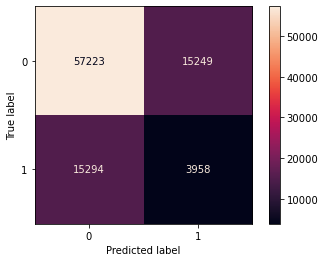

baseline Model Training ROC Curve


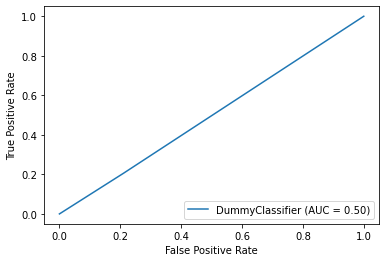

baseline Model Test Confusion Matrix


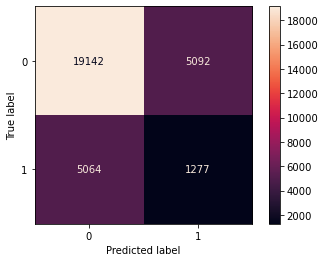

baseline Model Test ROC Curve


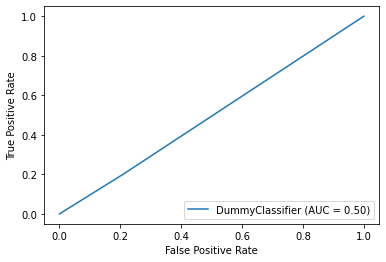

In [32]:
model_metrics(baseline, X_train_KNNI, y_train, X_test_KNNI, y_test, 'baseline')

In [86]:
logreg_model= LogisticRegression(random_state=42, max_iter=2000)
logreg_model.fit(X_train_KNNI, y_train)

LogisticRegression(max_iter=2000, random_state=42)

C:\Users\steve\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\steve\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html


    Simple Logistic Regression Model Training Metrics:
    Accuracy Score: 0.848
    Recall Score: 0.461
    Precision Score: 0.713
    F1 Score: 0.56
    Cross Validation Score: 0.847
    ------
    Simple Logistic Regression Model Test Metrics:
    Accuracy Score: 0.849
    Recall Score: 0.469
    Precision Score: 0.703
    F1 Score: 0.562
    
Simple Logistic Regression Model Training Confusion Matrix


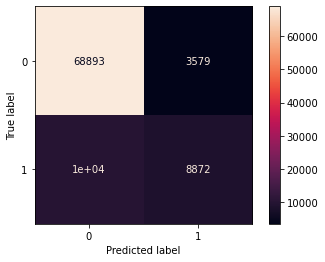

Simple Logistic Regression Model Training ROC Curve


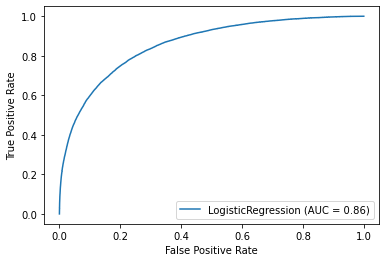

Simple Logistic Regression Model Test Confusion Matrix


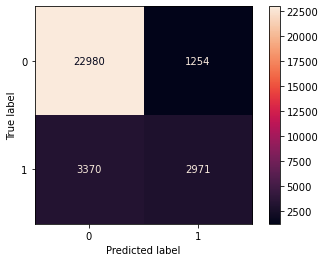

Simple Logistic Regression Model Test ROC Curve


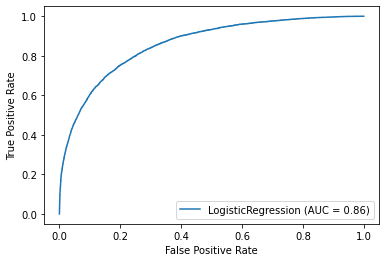

In [87]:
model_metrics(logreg_model, X_train_KNNI, y_train, X_test_KNNI, y_test, 'Simple Logistic Regression')

## Simple Logistic Regression

In [82]:
logreg_model_scaled = LogisticRegression(random_state=42, max_iter=1000)
logreg_model_scaled.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)


    Scaled Logistic Regression Model Training Metrics:
    Accuracy Score: 0.849
    Recall Score: 0.47
    Precision Score: 0.714
    F1 Score: 0.567
    Cross Validation Score: 0.848
    ------
    Scaled Logistic Regression Model Test Metrics:
    Accuracy Score: 0.852
    Recall Score: 0.48
    Precision Score: 0.71
    F1 Score: 0.573
    
Scaled Logistic Regression Model Training Confusion Matrix


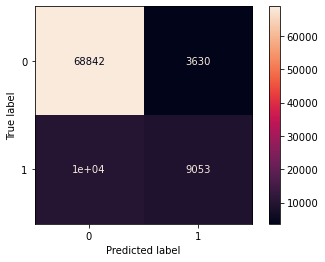

Scaled Logistic Regression Model Training ROC Curve


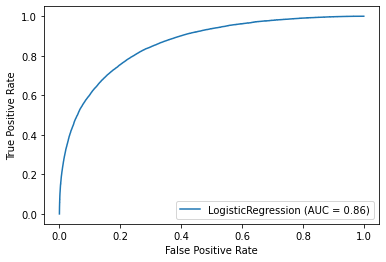

Scaled Logistic Regression Model Test Confusion Matrix


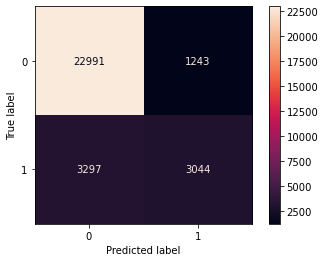

Scaled Logistic Regression Model Test ROC Curve


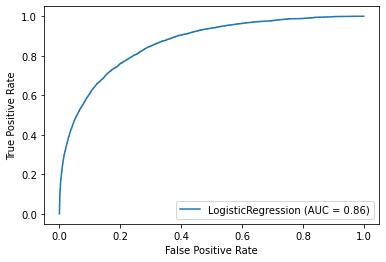

In [83]:
model_metrics(logreg_model_scaled, X_train_scaled, y_train, X_test_scaled, y_test, 'Scaled Logistic Regression')

## Using SMOTE to Balance

In [35]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train_scaled, y_train)

In [36]:
print('Original class distribution: \n')
y_series = pd.Series(y_train)
print(y_series.value_counts())
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
y_series_resampled = pd.Series(y_train_resampled)
print(y_series_resampled.value_counts()) 

Original class distribution: 

0    72472
1    19252
dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    72472
0    72472
dtype: int64


In [59]:
SMOTE_model = LogisticRegression(random_state=42, max_iter=1000)
SMOTE_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=5000, random_state=42)


    SMOTE Model Model Training Metrics:
    Accuracy Score: 0.786
    Recall Score: 0.784
    Precision Score: 0.787
    F1 Score: 0.785
    Cross Validation Score: 0.785
    ------
    SMOTE Model Model Test Metrics:
    Accuracy Score: 0.786
    Recall Score: 0.769
    Precision Score: 0.489
    F1 Score: 0.598
    
SMOTE Model Model Training Confusion Matrix


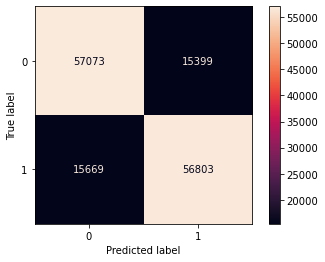

SMOTE Model Model Training ROC Curve


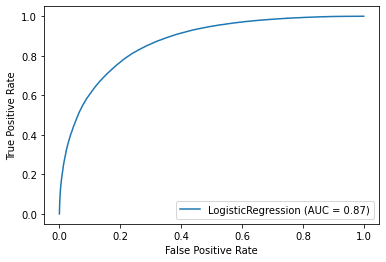

SMOTE Model Model Test Confusion Matrix


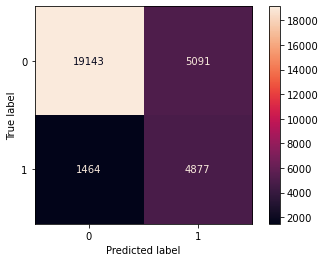

SMOTE Model Model Test ROC Curve


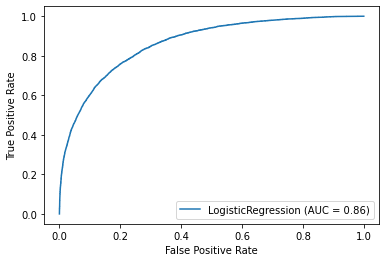

In [60]:
model_metrics(SMOTE_model, X_train_resampled, y_train_resampled, X_test_scaled, y_test, 'SMOTE Model')

## Trying an SGD

In [39]:
SGD_model = SGDClassifier(random_state=42)
SGD_model.fit(X_train_scaled, y_train)

SGDClassifier(random_state=42)


    First SGD Model Training Metrics:
    Accuracy Score: 0.844
    Recall Score: 0.391
    Precision Score: 0.742
    F1 Score: 0.512
    Cross Validation Score: 0.847
    ------
    First SGD Model Test Metrics:
    Accuracy Score: 0.846
    Recall Score: 0.403
    Precision Score: 0.734
    F1 Score: 0.52
    
First SGD Model Training Confusion Matrix


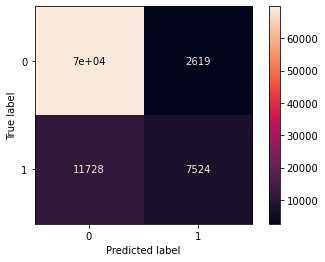

First SGD Model Training ROC Curve


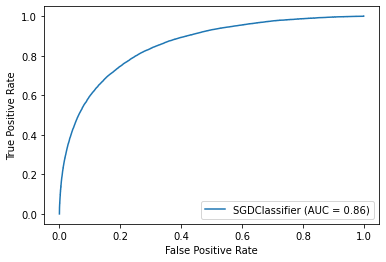

First SGD Model Test Confusion Matrix


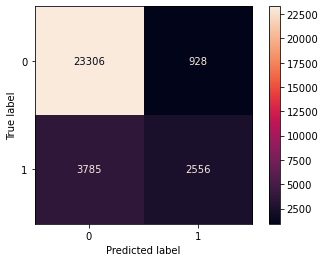

First SGD Model Test ROC Curve


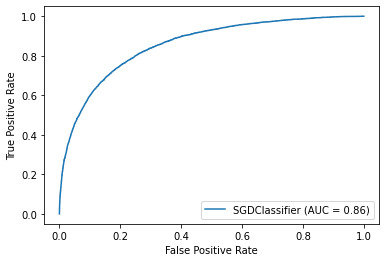

In [40]:
model_metrics(SGD_model, X_train_scaled, y_train, X_test_scaled, y_test, 'First SGD')

In [41]:
SGD_model2 = SGDClassifier(random_state=42)
SGD_model2.fit(X_train_resampled, y_train_resampled)

SGDClassifier(random_state=42)


    Second SGD Model Training Metrics:
    Accuracy Score: 0.783
    Recall Score: 0.836
    Precision Score: 0.756
    F1 Score: 0.794
    Cross Validation Score: 0.775
    ------
    Second SGD Model Test Metrics:
    Accuracy Score: 0.752
    Recall Score: 0.823
    Precision Score: 0.447
    F1 Score: 0.579
    
Second SGD Model Training Confusion Matrix


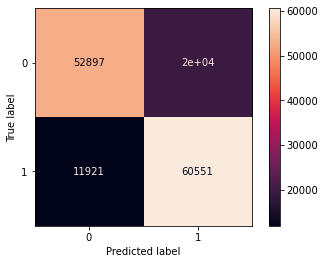

Second SGD Model Training ROC Curve


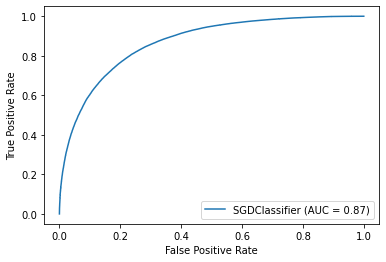

Second SGD Model Test Confusion Matrix


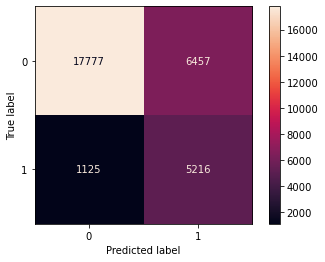

Second SGD Model Test ROC Curve


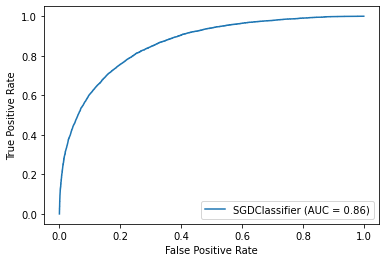

In [42]:
model_metrics(SGD_model2, X_train_resampled, y_train_resampled, X_test_scaled, y_test, 'Second SGD')

## Gettin' Griddy With It

In [43]:
#grid = {
#    'max_iter': [1000,5000,10000],
#    'loss': ['hinge','squared_hinge'],
#    'penalty': ['l2', 'l1', 'elasticnet'],
#    'class_weight': ['balanced', None]
#}
#gs = GridSearchCV(estimator=SGD_model, param_grid=grid, cv=5)
#gs.fit(X_train_resampled, y_train_resampled)
#gs.best_params_

In [44]:
SGD_model3 = SGDClassifier(max_iter=10000,loss = 'log', class_weight='balanced',random_state=42)
SGD_model3.fit(X_train_resampled, y_train_resampled)

SGDClassifier(class_weight='balanced', loss='log', max_iter=10000,
              random_state=42)


    Third SGD Model Training Metrics:
    Accuracy Score: 0.779
    Recall Score: 0.855
    Precision Score: 0.742
    F1 Score: 0.794
    Cross Validation Score: 0.776
    ------
    Third SGD Model Test Metrics:
    Accuracy Score: 0.733
    Recall Score: 0.844
    Precision Score: 0.427
    F1 Score: 0.567
    
Third SGD Model Training Confusion Matrix


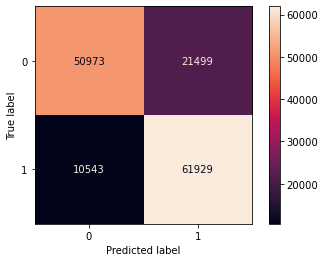

Third SGD Model Training ROC Curve


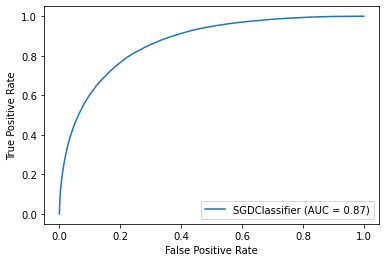

Third SGD Model Test Confusion Matrix


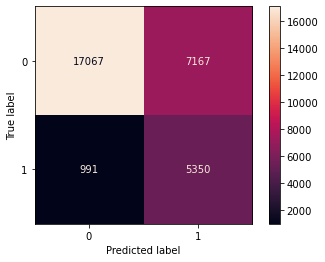

Third SGD Model Test ROC Curve


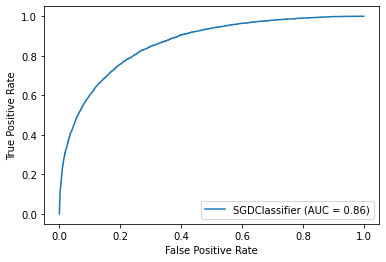

In [45]:
model_metrics(SGD_model3, X_train_resampled, y_train_resampled, X_test_scaled, y_test, 'Third SGD')

In [46]:
SGD_model4 = SGDClassifier(penalty = "elasticnet",random_state=42)
SGD_model4.fit(X_train_resampled, y_train_resampled)

SGDClassifier(penalty='elasticnet', random_state=42)


    Third SGD Model Training Metrics:
    Accuracy Score: 0.783
    Recall Score: 0.829
    Precision Score: 0.76
    F1 Score: 0.793
    Cross Validation Score: 0.778
    ------
    Third SGD Model Test Metrics:
    Accuracy Score: 0.756
    Recall Score: 0.816
    Precision Score: 0.451
    F1 Score: 0.581
    
Third SGD Model Training Confusion Matrix


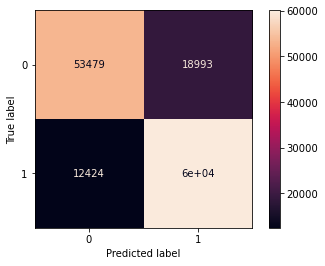

Third SGD Model Training ROC Curve


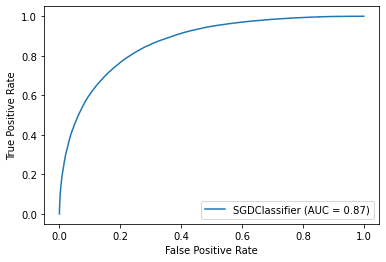

Third SGD Model Test Confusion Matrix


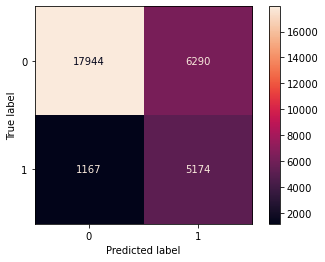

Third SGD Model Test ROC Curve


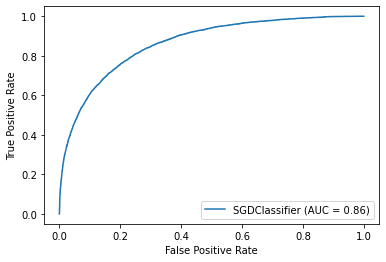

In [47]:
model_metrics(SGD_model4, X_train_resampled, y_train_resampled, X_test_scaled, y_test, 'Third SGD')

## B-b-b-b-booooost it

In [48]:
boost_model = xgboost.XGBClassifier(random_state=42, objective='binary:logistic')

boost_model.fit(X_train_KNNI, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


    First Boost Model Training Metrics:
    Accuracy Score: 0.891
    Recall Score: 0.601
    Precision Score: 0.834
    F1 Score: 0.698
    Cross Validation Score: 0.857
    ------
    First Boost Model Test Metrics:
    Accuracy Score: 0.861
    Recall Score: 0.518
    Precision Score: 0.734
    F1 Score: 0.608
    
First Boost Model Training Confusion Matrix


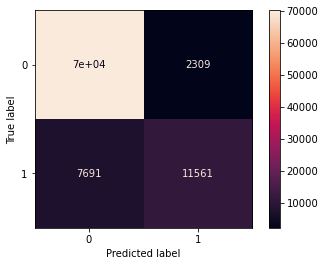

First Boost Model Training ROC Curve


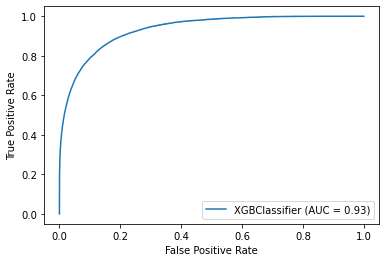

First Boost Model Test Confusion Matrix


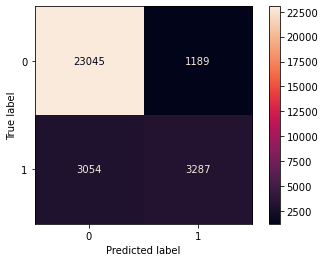

First Boost Model Test ROC Curve


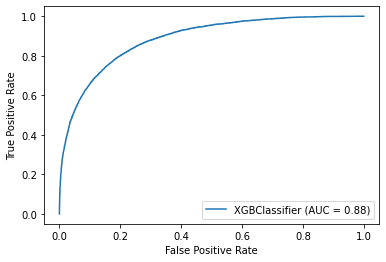

In [49]:
model_metrics(boost_model, X_train_KNNI, y_train, X_test_KNNI, y_test,'First Boost')

In [50]:
boost_model2 = xgboost.XGBClassifier(random_state=42, objective='binary:logistic')

boost_model2.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


    Second Boost Model Training Metrics:
    Accuracy Score: 0.925
    Recall Score: 0.89
    Precision Score: 0.958
    F1 Score: 0.923
    Cross Validation Score: 0.886
    ------
    Second Boost Model Test Metrics:
    Accuracy Score: 0.859
    Recall Score: 0.534
    Precision Score: 0.715
    F1 Score: 0.611
    
Second Boost Model Training Confusion Matrix


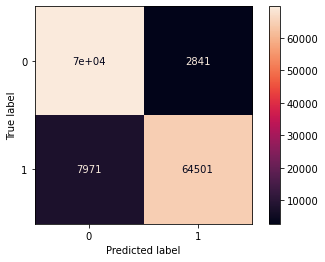

Second Boost Model Training ROC Curve


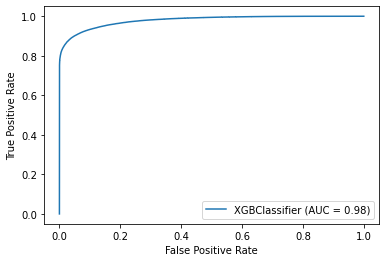

Second Boost Model Test Confusion Matrix


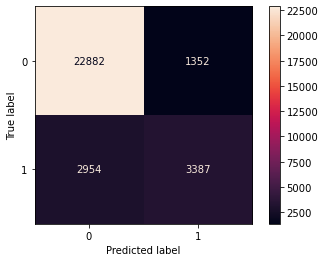

Second Boost Model Test ROC Curve


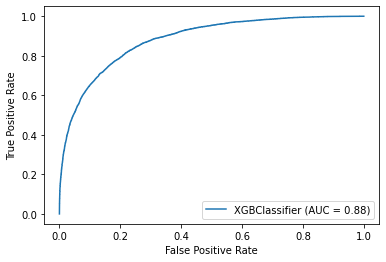

In [51]:
model_metrics(boost_model2, X_train_resampled, y_train_resampled, X_test_scaled, y_test, 'Second Boost')

In [52]:
grid = {
   'objective=': ['binary:logistic'],
   'max_depth': [6,8,10],
   'tree_method': ['auto','hist'],
}
#gsx = GridSearchCV(estimator=boost_model, param_grid=grid, cv=5, verbose=2)
#gsx.fit(X_train_KNNI, y_train)
#gsx.best_params_

In [53]:
boost_model3 = xgboost.XGBClassifier(random_state=42, objective='binary:logistic', max_depth=6, tree_method='hist')

boost_model3.fit(X_train_KNNI, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='hist', validate_parameters=1, verbosity=None)


    Third Boost Model Training Metrics:
    Accuracy Score: 0.893
    Recall Score: 0.602
    Precision Score: 0.841
    F1 Score: 0.701
    Cross Validation Score: 0.857
    ------
    Third Boost Model Test Metrics:
    Accuracy Score: 0.861
    Recall Score: 0.517
    Precision Score: 0.733
    F1 Score: 0.607
    
Third Boost Model Training Confusion Matrix


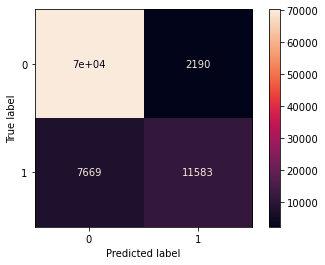

Third Boost Model Training ROC Curve


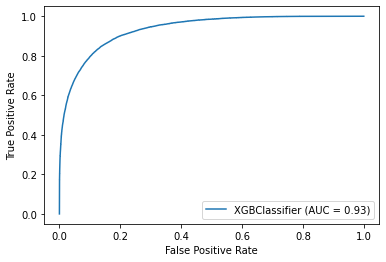

Third Boost Model Test Confusion Matrix


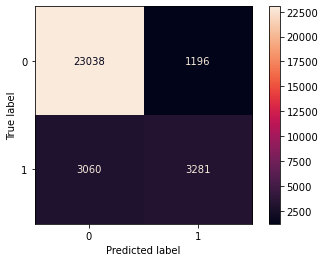

Third Boost Model Test ROC Curve


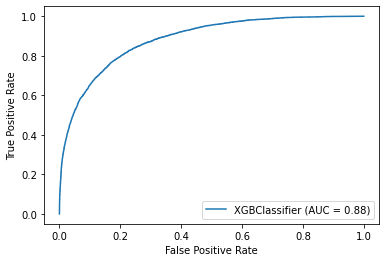

In [54]:
model_metrics(boost_model3, X_train_KNNI, y_train, X_test_KNNI, y_test, 'Third Boost')

In [55]:
boost_model4 = xgboost.XGBClassifier(eta =.15, random_state=42, objective='binary:logistic',tree_method='hist')

boost_model4.fit(X_train_KNNI, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.15, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.150000006, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='hist', validate_parameters=1, verbosity=None)


    Fourth Boost Model Training Metrics:
    Accuracy Score: 0.875
    Recall Score: 0.54
    Precision Score: 0.801
    F1 Score: 0.645
    Cross Validation Score: 0.857
    ------
    Fourth Boost Model Test Metrics:
    Accuracy Score: 0.861
    Recall Score: 0.501
    Precision Score: 0.743
    F1 Score: 0.598
    
Fourth Boost Model Training Confusion Matrix


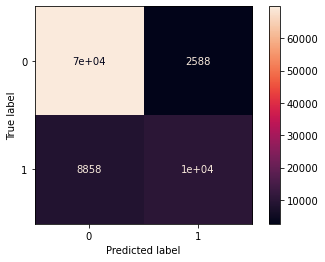

Fourth Boost Model Training ROC Curve


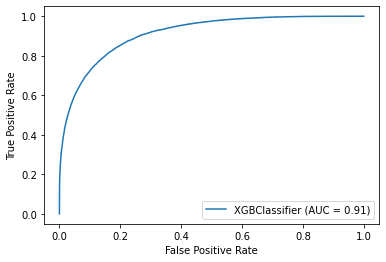

Fourth Boost Model Test Confusion Matrix


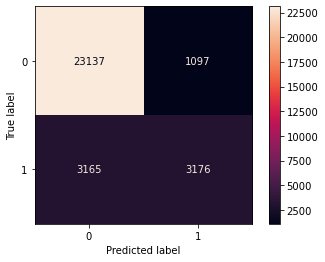

Fourth Boost Model Test ROC Curve


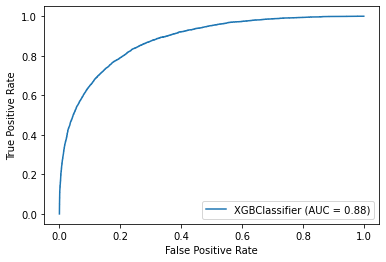

In [56]:
model_metrics(boost_model4, X_train_KNNI, y_train, X_test_KNNI, y_test, 'Fourth Boost')

In [57]:
#selector = RFE(boost_model4, n_features_to_select=10, verbose=2)
#selector = selector.fit(X_train_KNNI, y_train)
#print(selector.support_)

Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.


KeyboardInterrupt: 

Next Steps
Create Models for all locations

In [ ]:
feature_names = np.array(X_train_KNNI.columns)

In [ ]:
feature_names = np.array(X_train_KNNI.columns)
feature_names[selector.support_]

In [ ]:
X_train_feats = X_train_KNNI[['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm',
       'Pressure3pm', 'Cloud3pm', 'Location_Brisbane',
       'Location_MountGinini', 'Location_Perth', 'Location_Witchcliffe']]
X_test_feats = X_test_KNNI[['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm',
       'Pressure3pm', 'Cloud3pm', 'Location_Brisbane',
       'Location_MountGinini', 'Location_Perth', 'Location_Witchcliffe']]

In [ ]:
boost_model5 = xgboost.XGBClassifier(eta =.15, random_state=42, objective='binary:logistic',tree_method='hist')

boost_model5.fit(X_train_feats, y_train)

In [ ]:
model_metrics(boost_model5, X_train_feats, y_train, X_test_feats, y_test, 'Fifth Boost')

## The Fourth Boost Model is Our Final Model

In [12]:
Final_Model = xgboost.XGBClassifier(eta =.15, random_state=42, objective='binary:logistic',tree_method='hist')

Final_Model.fit(X_train_KNNI, y_train)

C:\Users\steve\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.15, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.150000006, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='hist', validate_parameters=1, verbosity=None)


    Final Model Training Metrics:
    Accuracy Score: 0.875
    Recall Score: 0.54
    Precision Score: 0.801
    F1 Score: 0.645
    Cross Validation Score: 0.857
    ------
    Final Model Test Metrics:
    Accuracy Score: 0.861
    Recall Score: 0.501
    Precision Score: 0.743
    F1 Score: 0.598
    
Final Model Training Confusion Matrix


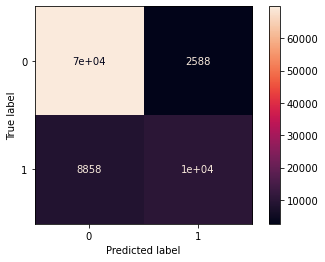

Final Model Training ROC Curve


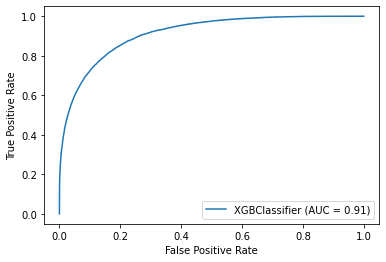

Final Model Test Confusion Matrix


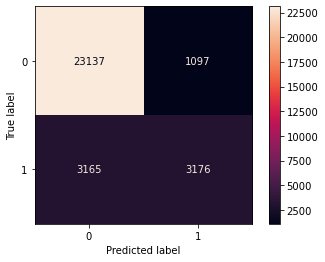

Final Model Test ROC Curve


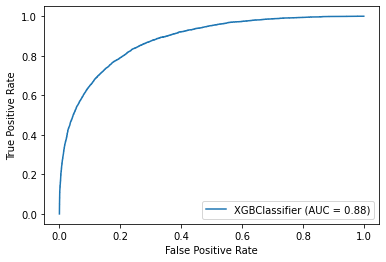

In [7]:
model_metrics(Final_Model, X_train_KNNI, y_train, X_test_KNNI, y_test, 'Final')

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

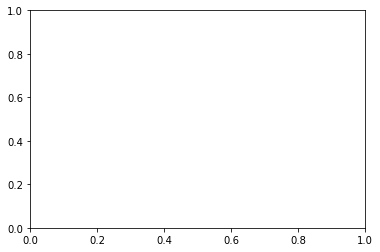

In [15]:
plot_tree(Final_Model)
plt.show()

In [14]:
conda install graphviz python-graphviz

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda





Solving environment: ...working... done

# All requested packages already installed.

